In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('dataset/height-weight.csv')
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [40]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


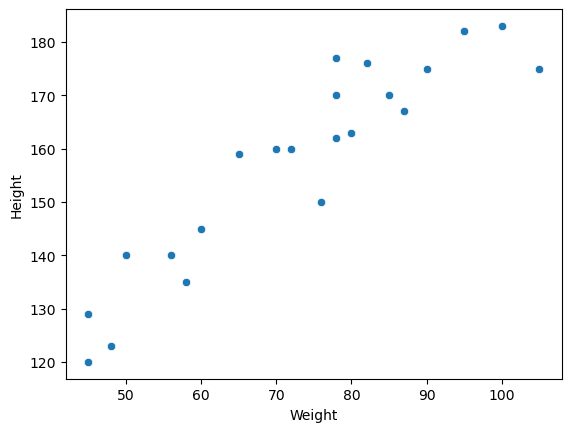

In [41]:
sns.scatterplot(data=df,x='Weight',y='Height')
plt.show()

In [42]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


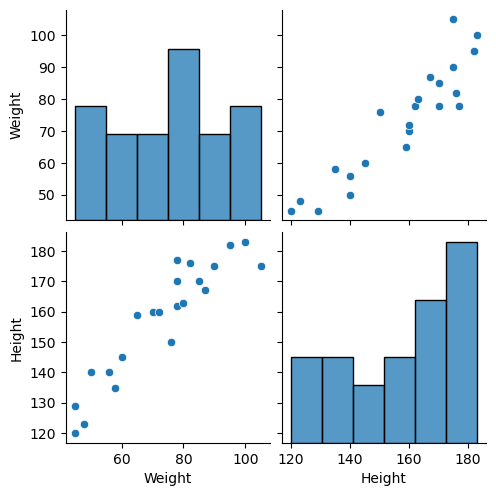

In [43]:
sns.pairplot(df)

In [44]:
import numpy as np
#independent and dependent features
X=df[['Weight']]
np.array(X).shape

(23, 1)

In [45]:
X=df[['Weight']]
Y=df[['Height']]#this variable can be in series or 1D array


In [46]:
X_series=df['Weight']
np.array(X_series).shape

(23,)

In [47]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [77]:
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [78]:
X_test

array([[ 0.01711717],
       [ 0.01711717],
       [-1.67748224],
       [ 0.89009262],
       [-0.6504523 ],
       [ 1.40360759]])

In [80]:
Y_train

,Height
1,135
13,183
5,162
2,123
11,182
20,129
3,145
4,160
18,150
16,140


In [81]:
Y_test

,Height
15,177
9,170
0,120
8,182
17,159
12,175


In [82]:
X_train.shape

(17, 1)

In [83]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(X_train)

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [84]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [85]:
X_test=scaler.fit_transform(X_test)
X_test

array([[ 0.01711717],
       [ 0.01711717],
       [-1.67748224],
       [ 0.89009262],
       [-0.6504523 ],
       [ 1.40360759]])

# LinearRegression

In [86]:
#apply linear regression
from sklearn.linear_model import LinearRegression

In [87]:
regression=LinearRegression()

In [88]:
regression.fit(X_train,Y_train)

LinearRegression()

In [89]:
print('Cofficient or slope;',regression.coef_)
print('Intercept;',regression.intercept_)

Cofficient or slope; [[17.2982057]]
Intercept; [156.47058824]


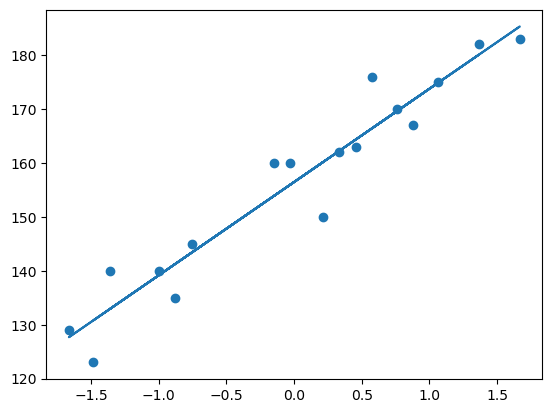

In [90]:
#plot training data plot best fit line
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))
plt.show()

# prediction of test data
1. predicted height output=intercept+coef_(Weights)
2. y_pred_test=156.470+17.29(X_test)

In [91]:
#prediction for test data
y_pred1=regression.predict(X_test)
y_pred1

array([[156.76668449],
       [156.76668449],
       [127.45315534],
       [171.86759345],
       [145.21893058],
       [180.75048107]])

In [92]:
#performace metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [93]:
mse=mean_squared_error(Y_test,y_pred1)
mae=mean_absolute_error(Y_test,y_pred1)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

160.95146497458575
11.763957233179141
12.686664848358916


In [94]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,y_pred1)
print(score)

0.6301147309872271


# RandomForestRegressor

In [95]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100 , random_state=0)
rfr.fit(X_train , Y_train)

C:\Users\bldea\AppData\Local\Temp\ipykernel_9704\1334068749.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train , Y_train)


RandomForestRegressor(random_state=0)

In [96]:
#prediction for test data
y_pred2=regression.predict(X_test)
y_pred2

array([[156.76668449],
       [156.76668449],
       [127.45315534],
       [171.86759345],
       [145.21893058],
       [180.75048107]])

In [97]:
#performace metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [98]:
mse_RFR=mean_squared_error(Y_test,y_pred2)
mae_RFR=mean_absolute_error(Y_test,y_pred2)
rmse_RFR=np.sqrt(mse_RFR)
print(mse_RFR)
print(mae_RFR)
print(rmse_RFR)

160.95146497458575
11.763957233179141
12.686664848358916


In [99]:
r2_RFR=r2_score(Y_test,y_pred2)
print(r2_RFR)

0.6301147309872271


# SupportVectorRegression

In [100]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train,Y_train)

C:\Users\bldea\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [101]:
y_pred3 = svr.predict(X_test)
y_pred3

array([160.22039467, 160.22039467, 155.23646622, 164.46915937,
       156.07702129, 164.27751591])

In [102]:
#performace metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [103]:
mse_SVR=mean_squared_error(Y_test,y_pred3)
mae_SVR=mean_absolute_error(Y_test,y_pred3)
rmse_SVR=np.sqrt(mse_SVR)
print(mse_SVR)
print(mae_SVR)
print(rmse_SVR)

341.6083716994706
15.495330052838668
18.482650559361623


In [104]:
r2_SVR=r2_score(Y_test,y_pred3)
print(r2_SVR)

0.2149440548240702


# LassoRegression

In [105]:
from sklearn.linear_model import Lasso
la = Lasso(alpha=3.0)
la.fit(X_train , Y_train)

Lasso(alpha=3.0)

In [106]:
y_pred4 = la.predict(X_test)
y_pred4

array([156.71533299, 156.71533299, 132.48560206, 169.19731559,
       147.17028748, 176.5396583 ])

In [107]:
mse_LA=mean_squared_error(Y_test,y_pred4)
mae_LA=mean_absolute_error(Y_test,y_pred4)
rmse_LA=np.sqrt(mse_LA)
print(mse_LA)
print(mae_LA)
print(rmse_LA)

175.01028769893136
12.037831885043966
13.229145388078981


In [108]:
r2_LA=r2_score(Y_test,y_pred4)
print(r2_LA)

0.5978059140018175


In [109]:
df1 = pd.DataFrame({'Regression_Name':['LinearRegression','RandomForestRegression','SupportVectorRegression','LassoRegression'] , 'r2_score':[score,r2_RFR,r2_SVR,r2_LA] , 'mse':[mse,mse_RFR,mse_SVR,mse_LA] ,'mae':[mae,mae_RFR,mae_SVR,mae_LA],'rmse':[rmse,rmse_RFR,rmse_SVR,rmse_LA]})
df1

,Regression_Name,r2_score,mse,mae,rmse
0,LinearRegression,0.630115,160.951465,11.763957,12.686665
1,RandomForestRegression,0.630115,160.951465,11.763957,12.686665
2,SupportVectorRegression,0.214944,341.608372,15.495330,18.482651
3,LassoRegression,0.597806,175.010288,12.037832,13.229145
